In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

L'objectif du TP est :

- d'implémenter l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

- d'utiliser une fonction de OpenCV pour l'estimation dense du flot optique cv.calcOpticalFlowFarneback

- de comparer les 2 estimations obtenues.

On appliquera l'estimation de mouvement entre les 2 images ci-dessous, et on l'affichera soit sous forme de champ de vecteurs ou comme une image HSV.

In [19]:
img1 = cv2.imread('C:\\Users\\konta\\Desktop\\UFR SCIENCES ET TECHNIQUES\\Traitement Images\\Image_PetitJean\\Travaux pratiques\\donnees\\frame1.png')
img2 = cv2.imread('C:\\Users\\konta\\Desktop\\UFR SCIENCES ET TECHNIQUES\\Traitement Images\\Image_PetitJean\\Travaux pratiques\\donnees\\frame2.png')

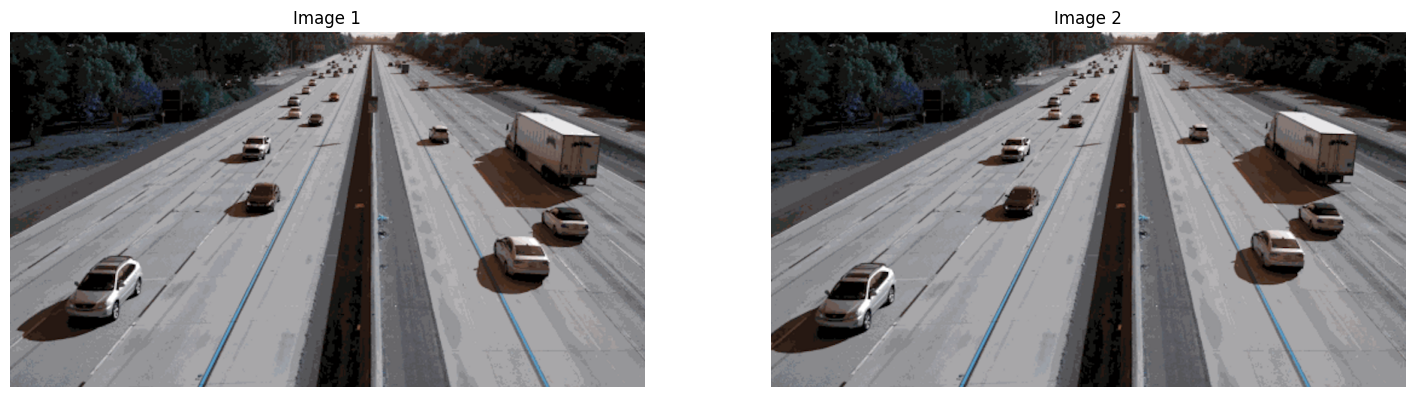

In [24]:
plt.figure(figsize=(18, 5)) 
plt.subplot(1, 2, 1)  # (1, 2, 1) signifie 1 ligne, 2 colonnes, position 1
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convertit BGR en RGB
plt.title('Image 1')
plt.axis('off')
plt.subplot(1, 2, 2) 
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) 
plt.title('Image 2')
plt.axis('off')  
plt.show()

In [7]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# 1. Methode de lucas Kanade
# goofFeatures permet de trouver les coins dans la première image
corners = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.01, minDistance=10)
# Calculer le flot optique Lucas-Kanade
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, corners, None, **lk_params)

# Sélectionner les points valides
good_new = p1[st==1]
good_old = corners[st==1]

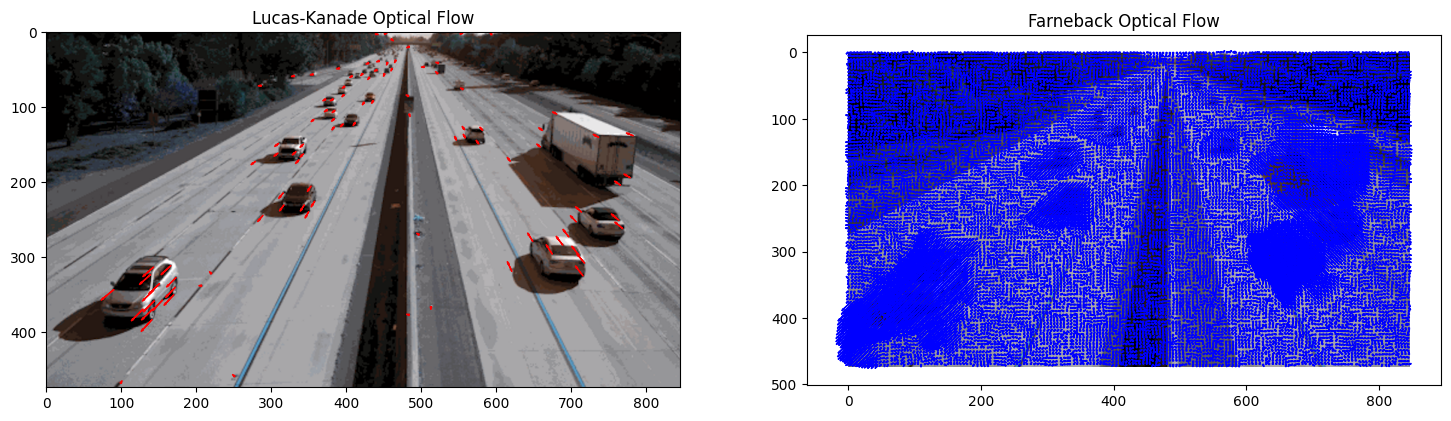

In [25]:
# 2. Methode de Farneback
# Calculer le flot optique dense
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Visualiser les résultats
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Affichage pour la méthode de Lucas-Kanade
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Lucas-Kanade Optical Flow')
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    ax[0].arrow(c, d, a - c, b - d, head_width=2, head_length=4, color='red')
    # Affichage pour la méthode de Farneback
ax[1].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[1].set_title('Farneback Optical Flow')
for i in range(0, flow.shape[0], 5):
    for j in range(0, flow.shape[1], 5):
        ax[1].arrow(j, i, flow[i, j, 0], flow[i, j, 1], head_width=2, head_length=4, color='blue')

plt.show()


## Estimation du flot optique par la méthode de Lucas-Kanade :

Nous avons utilisé la fonction cv.goodFeaturesToTrack pour détecter des points intéressants à suivre dans la première image.
Ensuite, avec la méthode de Lucas-Kanade (cv.calcOpticalFlowPyrLK), nous avons estimé le mouvement de ces points entre la première image et la seconde.
Le résultat a été visualisé sous la forme d'un champ de vecteurs rouges superposés sur la première image, représentant le déplacement des points caractéristiques détectés.

## Estimation dense du flot optique avec la méthode de Farneback :

Nous avons utilisé la fonction cv.calcOpticalFlowFarneback pour obtenir une estimation du mouvement pour chaque pixel entre les deux images.
Cette estimation a également été visualisée sous la forme d'un champ de vecteurs, où les vecteurs de mouvement significatifs (au-delà d'un certain seuil) ont été dessinés en rouge sur la première image.

## Comparaison des deux estimations :

La méthode de Lucas-Kanade nous a fourni un champ de vecteurs de mouvement pour un ensemble sélectionné de points, et ces vecteurs étaient principalement concentrés autour des objets en mouvement (les véhicules).
L'estimation dense de Farneback a produit un champ de vecteurs beaucoup plus rempli, montrant le mouvement sur toute l'image avec une densité plus élevée de vecteurs dans les zones avec des objets en mouvement.

Nous avons rencontré une erreur initiale en raison de l'absence de certains paramètres requis pour la fonction cv.goodFeaturesToTrack, mais nous avons corrigé cela en fournissant tous les paramètres nécessaires. Les visualisations ont montré que les véhicules sur l'autoroute se déplaçaient globalement dans la même direction, ce qui est cohérent avec le flux de trafic sur une autoroute. Les deux méthodes d'estimation du flot optique ont bien fonctionné et nous avons pu voir visuellement les différences entre l'approche sparse (Lucas-Kanade) et dense (Farneback).

Les résultats montrent comment le flot optique peut être utilisé pour détecter et analyser le mouvement dans des séquences d'images, ce qui est utile dans de nombreuses applications telles que la surveillance vidéo, la navigation autonome des véhicules et l'analyse des activités sportives.